In [1]:
using PyPlot
using LinearAlgebra
using Random

Random.seed!(12345);

# Effects of Scan Order

Consider a simple linear regression task. Our objective is of the form
$$
    f(w) = \frac{1}{2n} \sum_{i=1}^n (x_i^T w - y_i)^2.
$$
Let's suppose we are working in $w \in \mathbb{R}^2$, and pick a specific set of training examples
$$
    x_i = \left[ \begin{array}{c} \cos(\pi i / n) \\ \sin(\pi i / n) \end{array} \right],
    \hspace{2em}
    y_i = 0.
$$
Our stochastic gradient updates will be
$$
    w_{t+1} = w_t - \alpha x_i (x_i^T w_t - y_i).
$$
Let's pick $\alpha = 1$ and see what happens when we vary the scan order.

(This is the _normalized tight frame_ example from here: https://people.eecs.berkeley.edu/~brecht/papers/12.Recht.Re.amgm.pdf).

In [2]:
n = 7;
d = 2;
xs = [[cos(pi * i / n), sin(pi * i / n)] for i = 1:n];
ys = [0.0 for i = 1:n];

w0 = rand(d);
alpha = 1.0;

# true solution is just zero
w_opt = zeros(d);

In [3]:
function sgd_sequential_scan(xs, ys, w0, alpha, w_opt, num_iters)
    n = length(xs);
    w = w0;
    dists_to_opt = Float64[];
    for t = 1:num_iters
        i = mod1(t,n);
        xi = xs[i];
        yi = ys[i];
        w -= alpha * xi * (dot(xi, w) - yi);
        push!(dists_to_opt, norm(w - w_opt));
    end
    return dists_to_opt;
end

sgd_sequential_scan (generic function with 1 method)

In [4]:
function sgd_random_scan(xs, ys, w0, alpha, w_opt, num_iters)
    n = length(xs);
    w = w0;
    dists_to_opt = Float64[];
    for t = 1:num_iters
        i = rand(1:n);
        xi = xs[i];
        yi = ys[i];
        w -= alpha * xi * (dot(xi, w) - yi);
        push!(dists_to_opt, norm(w - w_opt));
    end
    return dists_to_opt;
end

sgd_random_scan (generic function with 1 method)

In [5]:
num_iters = 500;

dto_seq_scan = sgd_sequential_scan(xs, ys, w0, alpha, w_opt, num_iters);
dto_rnd_scan = sgd_random_scan(xs, ys, w0, alpha, w_opt, num_iters);

In [6]:
semilogy(dto_seq_scan; label="sequential scan");
semilogy(dto_rnd_scan; label="random scan");

legend(loc=3);
xlabel("iteration");
ylabel("distance to optimum");
title("Comparison of Different Scan Orders for SGD");

### Question: is sequential scan generally bad for this problem, or was this order just particularly bad?

Let's investigate by looking at random permutations of the input data.

In [7]:
dto_seq_scan_ro = [sgd_sequential_scan(shuffle(xs), ys, w0, alpha, w_opt, num_iters) for i = 1:5];

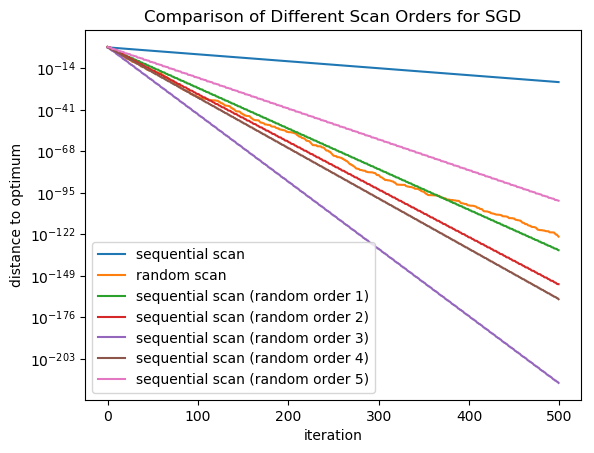

In [8]:
semilogy(dto_seq_scan; label="sequential scan");
semilogy(dto_rnd_scan; label="random scan");
for k = 1:5
    semilogy(dto_seq_scan_ro[k]; label="sequential scan (random order $k)");
end

legend(loc=3);
xlabel("iteration");
ylabel("distance to optimum");
title("Comparison of Different Scan Orders for SGD");